<a href="https://colab.research.google.com/github/dbasso98/Unsupervised-Learning/blob/main/first_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - PCA 

First of all, let's load the _Dry-Bean-Dataset_, retrieved from: https://archive-beta.ics.uci.edu/dataset/602/dry+bean+dataset

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='dark')
import scipy as sp
import sys
sys.path.insert(0,'/content/drive/MyDrive/UnsupervisedLearning')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data loading
data = pd.read_excel('/content/drive/MyDrive/UnsupervisedLearning/first_exercise/data/DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [ ]:
# Brief dataset view
print(data.head())
# Data dimension
print(f'The original dimension of the dataset is: {data.shape}')

# We can save the 'Class' column values,
# remove it from the dataset and then 
# convert the dataframe into numpy matrix
labels = data['Class'].values
numerical_data = data.drop(['Class'], axis=1)
matrix = numerical_data.to_numpy(copy=True)


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

Now we can:
1. Preprocess the data by centering the variables and divide them by their standard deviation.

In [ ]:
def normalize(X):
    return np.divide((X - X.mean(axis=0)), X.std(axis=0))

In [ ]:
matrix = normalize(matrix)

Then:

2. Compute the Principal Components Analysis on these variables. Obtain and plot the eigenvalue spectrum using logscale for the y-axis.

In [ ]:
def PCA(X, n_components):
    # compute the covariance matrix
    covariance = X.T@X/X.shape[0]
    # compute the eigenvalues and eigenvectors of the covariance matrix
    # and get the largest n_components evalues and evectors
    eigenvalues, eigenvectors = sp.linalg.eigh(covariance, subset_by_index = (len(covariance)-n_components, len(covariance)-1))
    # sort in decreasing order the eigenvalues and eigenvectors
    sorted_eigenvalues = eigenvalues[::-1]
    sorted_eigenvectors = eigenvectors[:,::-1]
    Y = X@sorted_eigenvectors
    return sorted_eigenvalues, sorted_eigenvectors, Y 

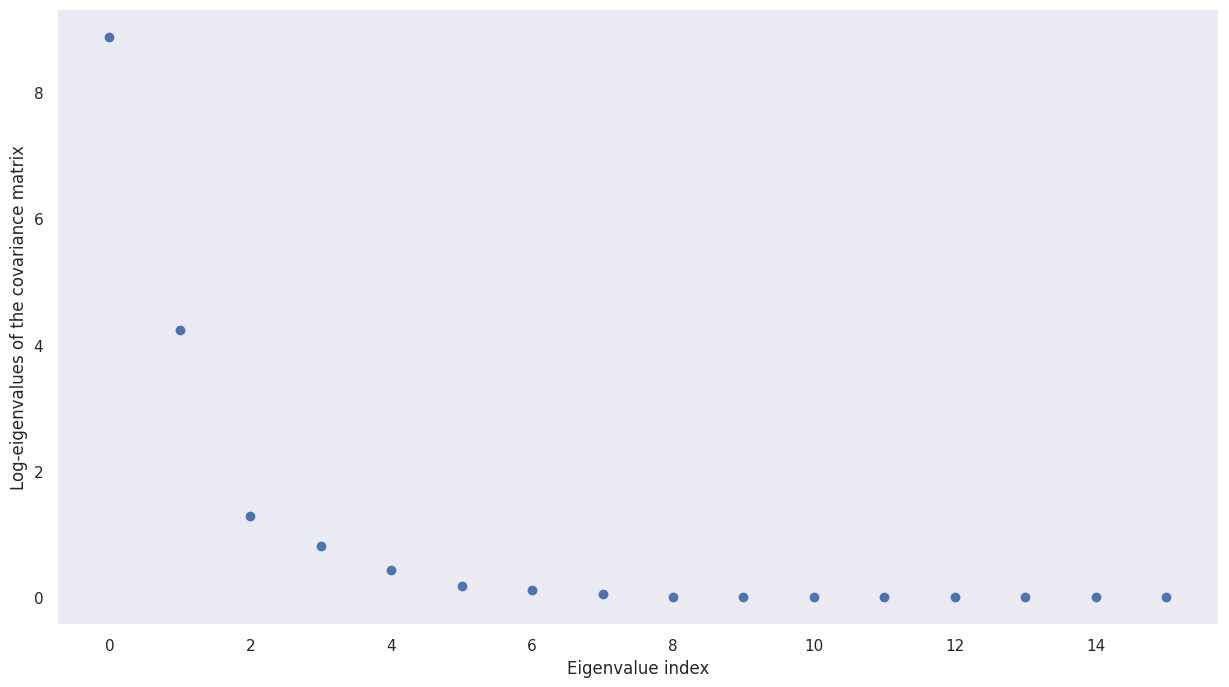

In [ ]:
eigenvalues, eigenvectors, _ = PCA(matrix, 16)
plt.figure(figsize=(15,8))
plt.plot(eigenvalues, 'o')
plt.ylabel("Log-eigenvalues of the covariance matrix")
plt.xlabel("Eigenvalue index")
plt.show()

In [ ]:
# We can check the explained variance per principal component
explained_variance = np.cumsum(eigenvalues)/np.sum(eigenvalues)
explained_variance

array([0.55466439, 0.81897412, 0.89903976, 0.95018056, 0.97757349,
       0.9890711 , 0.99604761, 0.99929843, 0.9998147 , 0.99990557,
       0.99997146, 0.99998983, 0.99999913, 0.99999975, 0.99999989,
       1.        ])

Now we can:

3. Project the data in the two first PCs and color it by the class column.

Text(0.5, 1.0, 'PCA with first 2 Principal Components')

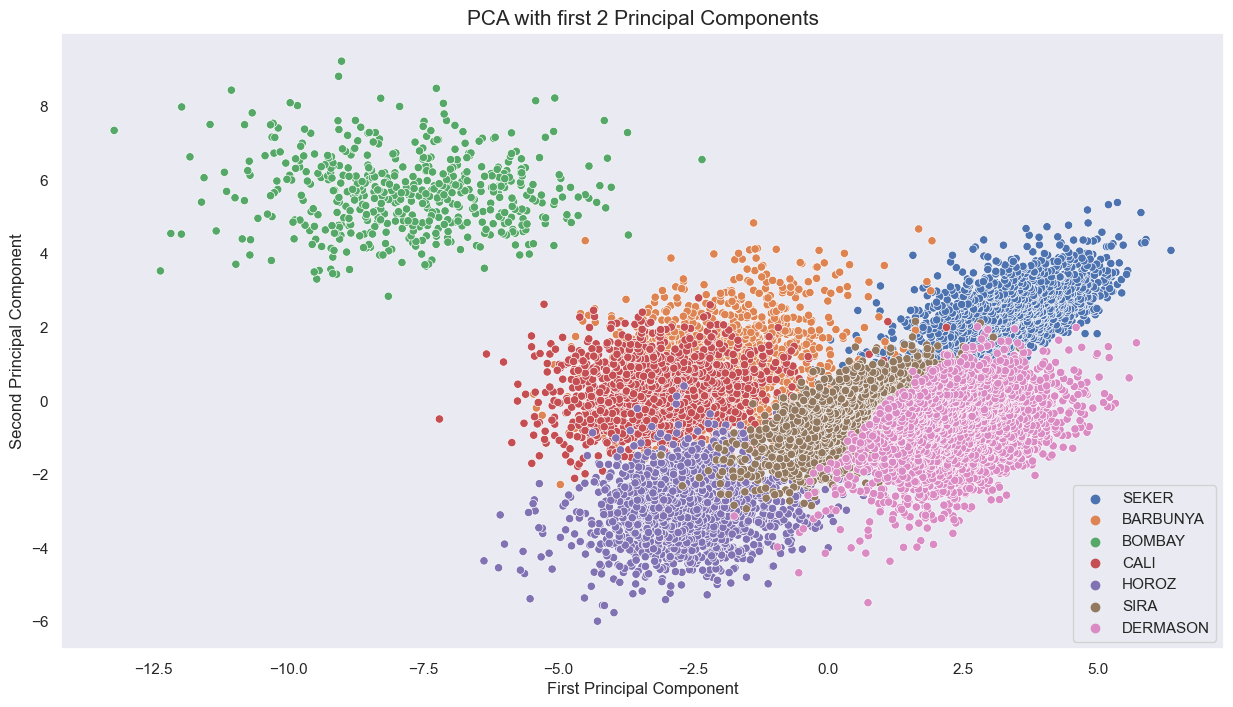

In [ ]:
# Plot the first 2 PCs
_, _, Y = PCA(matrix, 2)
plt.figure(figsize=(15,8))
sns.scatterplot(x = Y[:,0], y = Y[:,1], hue=labels)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(loc='best',  bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title('PCA with first 2 Principal Components', fontsize=15)


Finally:

4. Repeat the plot using the three instead of two PCs.

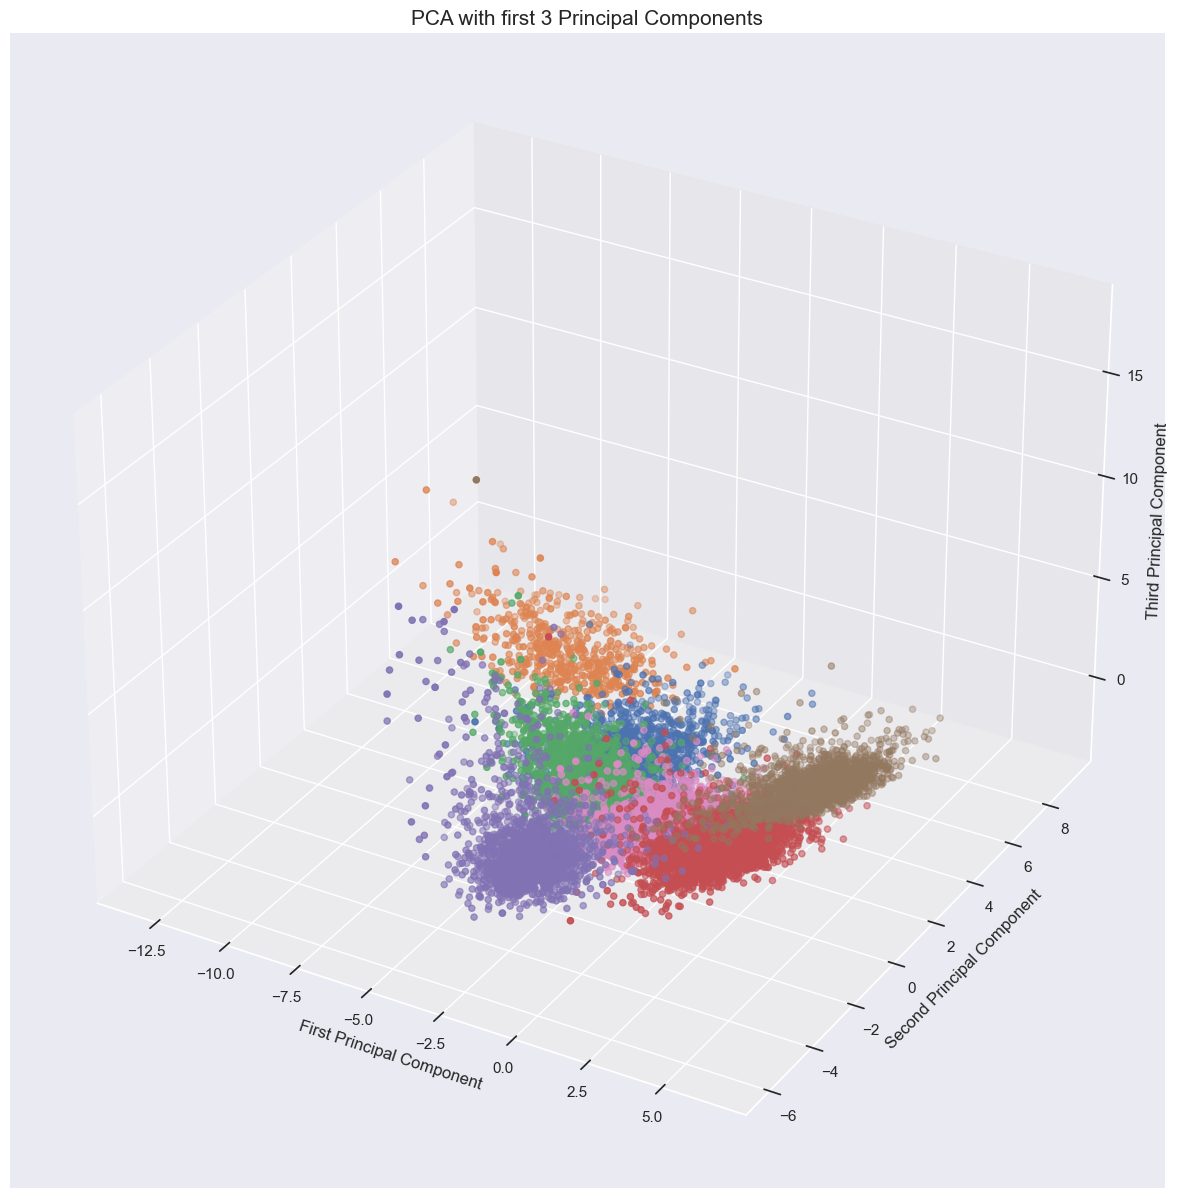

In [ ]:
# Plot the first 3 PCs
_, _, Y = PCA(matrix, 3)
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')
for label in np.unique(labels):
    ix = np.where(labels==label)
    ax.scatter(Y[:,0][ix], Y[:,1][ix], Y[:,2][ix])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('PCA with first 3 Principal Components', fontsize=15)
plt.show()